## Simulation Initialization

In [17]:
# We import these lines for debugging purposes, only works on Jupyter Notebook
%load_ext autoreload
%autoreload 2
%matplotlib widget

from rocketpy import Environment, SolidMotor, Rocket, Flight

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



Gravity Details

Acceleration of gravity at surface level:    9.7912 m/s²
Acceleration of gravity at  79.114 km (ASL): 9.5544 m/s²


Launch Site Details

Launch Date: 2025-11-17 12:00:00 UTC
Launch Site Latitude: 31.04434°
Launch Site Longitude: -103.53517°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 67032.58 W    3443364.25 N
Launch Site UTM zone: 13R
Launch Site Surface Elevation: 919.7 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 79.114 km
Forecast Time Period: from 2025-11-16 12:00:00 to 2025-12-02 12:00:00 utc
Forecast Hour Interval: 3 hrs
Forecast Latitude Range: From -90.0° to 90.0°
Forecast Longitude Range: From 0.0° to 359.75°

Surface Atmospheric Conditions

Surface Wind Speed: 3.12 m/s
Surface Wind Direction: 247.46°
Surface Wind Heading: 67.46°
Surface Pressure: 907.77 hPa
Surface Temperature: 293.18 K
Surface Air Density: 1.079 kg/m³
Surface Speed of Sound: 343.25 m/s


Earth Model Details

Earth Radius at Launch si

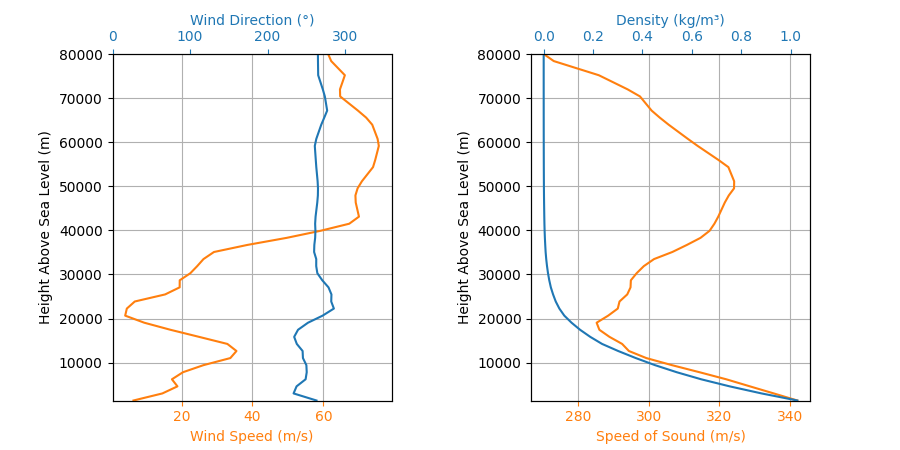

In [18]:
# Environment Configuration
env = Environment(latitude=31.04434, longitude=-103.53517, elevation=1400)

import datetime
tomorrow = datetime.date.today() + datetime.timedelta(days=1)

env.set_date(
    (tomorrow.year, tomorrow.month, tomorrow.day, 12)
)

env.set_atmospheric_model(type="Forecast", file="GFS")
env.info()

In [19]:
# Motor Definition

K2FullMotor = SolidMotor(
    thrust_source = r".\Raw Data\Valkyrie\K-2FullScaleTest.eng",
    dry_mass = 0.9,
    dry_inertia = (0.475, 0.475, 0.007),
    nozzle_radius = 0.06858/2,
    grain_number = 6,
    grain_density = 1501.44939, #calculated from Matt's sim
    grain_outer_radius = 0.082296,
    grain_initial_inner_radius = 0.0381,
    grain_initial_height = 0.147955,
    grain_separation = 0,
    grains_center_of_mass_position=0.508,
    center_of_dry_mass_position=0.4826,
    nozzle_position=0,
    burn_time = 4.06,
    throat_radius = 0.02794/2,
    coordinate_system_orientation="nozzle_to_combustion_chamber"
)


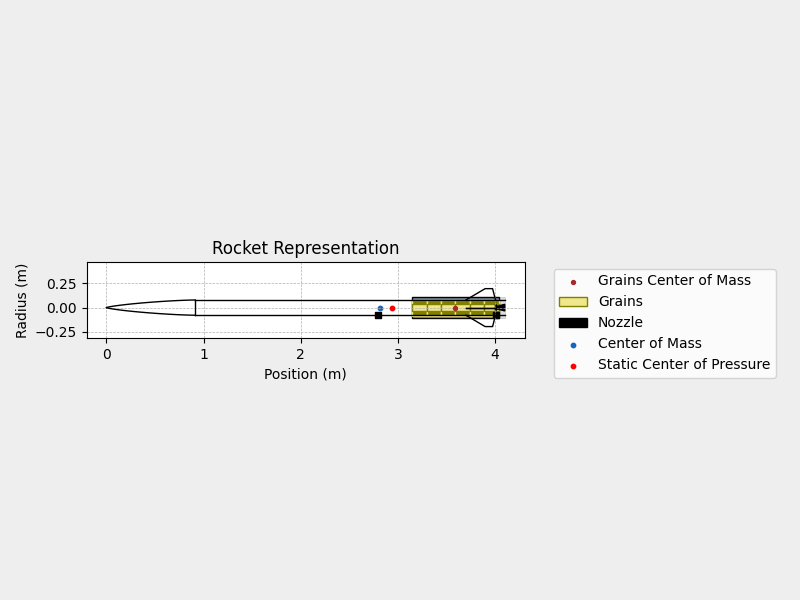

In [ ]:
# Define Rocket
Valkyrie = Rocket(
    radius = 0.15672/2,
    mass = 24.76,
    inertia = (0.1, 16.82, 16.82),
    power_off_drag="Raw Data/Valkyrie/SolidWorks_Power Off Drag Curve.csv",
    power_on_drag="Raw Data/Valkyrie/SolidWorks_Power Off Drag Curve.csv",
    center_of_mass_without_motor=2.08,
    coordinate_system_orientation="nose_to_tail",
)
Valkyrie.add_motor(K2FullMotor, position =4.1)

rail_buttons = Valkyrie.set_rail_buttons(
    upper_button_position=2.794,
    lower_button_position = 4.0132,
    angular_position=0,
)

fin_set = Valkyrie.add_trapezoidal_fins(
    n=4,
    root_chord=0.3048,
    tip_chord = 0.076708,
    span = 0.11684,
    position = -3.247,
    cant_angle = 0,
    sweep_angle = 59.44,
)

nose_cone = Valkyrie.add_nose(
    length = 0.9144, kind="von karman", position = 0
)

Drogue = Valkyrie.add_parachute(
    "Drogue", cd_s=1.00584, trigger="apogee", sampling_rate=100, lag=0
)

Main = Valkyrie.add_parachute(
    "Main", cd_s=2.34696, trigger=304.8, sampling_rate=100, lag=0
)
Valkyrie.draw()

In [21]:
# Nominal Flight Simulation
test_flight = Flight(
    rocket = Valkyrie, environment=env, rail_length=5.1, inclination=84.2, heading = 135)
test_flight.info()


Initial Conditions

Initial time: 0.000 s
Position - x: 0.00 m | y: 0.00 m | z: 919.72 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude (quaternions) - e0: -0.382 | e1: 0.019 | e2: -0.047 | e3: 0.923
Euler Angles - Spin φ : -0.00° | Nutation θ: -5.80° | Precession ψ: 225.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s | ω3: 0.00 rad/s
Initial Stability Margin: 0.797 c


Surface Wind Conditions

Frontal Surface Wind Speed: 1.21 m/s
Lateral Surface Wind Speed: 2.88 m/s


Launch Rail

Launch Rail Length: 5.1 m
Launch Rail Inclination: 84.20°
Launch Rail Heading: 135.00°


Rail Departure State

Rail Departure Time: 0.427 s
Rail Departure Velocity: 19.095 m/s
Rail Departure Stability Margin: 1.042 c
Rail Departure Angle of Attack: 9.378°
Rail Departure Thrust-Weight Ratio: 6.079
Rail Departure Reynolds Number: 1.792e+05


Burn out State

Burn out time: 4.060 s
Altitude at burn out: 1441.455 m (ASL) | 521.740 m (AGL)
Rocket speed at burn out: 248.243 m/s
Freestream ve